<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/unidade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 2 - Zeros de funções




Nesta unidade, vamos estudar métodos iterativos para aproximar raízes de funções. A seguir, apresentamos alguns exemplos discutidos durante a aula.

# Exemplo 1

Considere $f(x)=x^3-2x-5$.



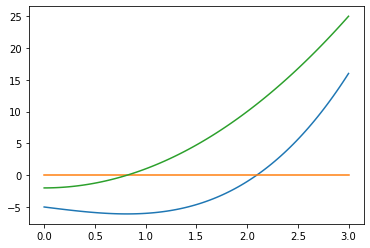

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,3,100)
y = np.zeros(100)
plt.figure(1)
plt.plot(x,x**3-2*x-5,label='f')
plt.plot(x,y,label='y=0')
plt.plot(x,3*x**2-2,label='g')

#print(1.5*1.5*1.3-2*1.5-5)


# Exemplo 2

Considere $f(x)=x^2+0.96x-2.08$. A função $f(x)$ possui uma raiz isolada no intervalo $[0,2]$. 

De fato, $f(x)$ troca de sinal, $f(0)=-2.08$ e $f(2)=3.84$. Além disso, $f'(x)>0,\forall x\in [0,2]$, ou seja, $f(x)$ é crescente em $[0,2]$. Portanto, existe uma única raiz no intervalo $[0,2]$.

 Considere as seguintes funções de ponto fixo:

$$\begin{array}{ll}
\displaystyle{\phi_1(x)=\dfrac{2.08-x^2}{0.96}} & \displaystyle{\phi_2(x)=\dfrac{2.08-0.96x}{x}} \\ 
\displaystyle{\phi_3(x)=\sqrt{2.08-0.96x}} & \displaystyle{\phi_4(x)=\dfrac{2.08}{x+0.96}} \\ 
\displaystyle{\phi_5(x)=\dfrac{2.08+x^2}{2x+0.96}} & \displaystyle{\phi_6(x)=x^2+1.96x-2.08}
\end{array}$$

Vamos considerar $x_0=1.5$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return(x**2 + 0.96*x - 2.08)

def phi1(x):
  return((2.08 - x**2)/0.96)

def phi2(x):
  return((2.08-0.96*x)/x)

def phi3(x):
  return(np.sqrt(2.08-0.96*x))

def phi4(x):
  return((2.08)/(x+0.96))

def phi5(x):
  return((2.08+x**2)/(2*x+0.96))

def phi6(x):
  return(x**2+1.96*x-2.08)

i=  1  xap =  -0.17708333333333326  delta =  2.2186414930555554
i=  2  xap =  2.1340015552662037  delta =  4.522604130934131
i=  3  xap =  -2.57704441445685  delta =  2.087195276204673
i=  4  xap =  -4.751206160503385  delta =  15.932802065522063
i=  5  xap =  -21.347874978755538  delta =  433.15780612897146
i=  6  xap =  -472.55392302976753  delta =  222851.4784047149
i=  7  xap =  -232609.5105946078  delta =  54106961111.85278
i=  8  xap =  -56361650434.35725  delta =  3.176635639630575e+21
i=  9  xap =  -3.3089954580048773e+21  delta =  1.0949450941096908e+43
i=  10  xap =  -1.1405678063642613e+43  delta =  1.300894920914583e+86
i=  11  xap =  -1.3550988759526906e+86  delta =  1.8362929636082458e+172


OverflowError: ignored

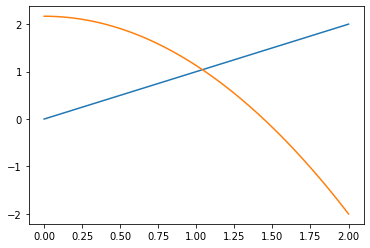

In [ ]:
x0 = 1.5
i = 0
imax = 100
tol = 1.0e-6
d = 1.0
x = np.linspace(0,2,100)
y = np.array(f(x))
z = np.array(phi1(x))

plt.figure(1)
plt.plot(x,x)
plt.plot(x,z)

while(d > tol and i < imax):
  x = phi1(x0)
  d = abs(f(x))
  x0 = x
  i += 1
  print("i= ",i," xap = ",x," delta = ",d)



# Exemplo 3 

$f(x)=2x\cos(x)$

In [ ]:
def f3(x):
  return(2*x-np.cos(x))

def phi3e(x):
  return(np.cos(x)/2)

In [ ]:
i = 0
x = 0
tol = 1.e-8
imax = 100
while(abs(f3(x)) > tol and i < imax):
  x = phi3e(x)
  i += 1
  print(i,x,abs(f3(x)))

1 0.5 0.12241743810962724
2 0.4387912809451864 0.02768328143004639
3 0.4526329216602096 0.00596709089309988
4 0.44964937621365964 0.0013008038355805107
5 0.4502997781314499 0.0002828875235380002
6 0.4501583343696809 6.155233292448603e-05
7 0.45018911053614313 1.3391385731087446e-05
8 0.4501824148432776 2.91351555825603e-06
9 0.4501838716010567 6.338796498805976e-07
10 0.4501835546612318 1.3791032738019737e-07
11 0.45018362361639547 3.000451831436379e-08
12 0.4501836086141363 6.527946072587554e-09


# Método da Bisecção

Dados $f(x)$, $a$ e $b$ tais que $f(a)\cdot f(b) < 0$, tol

Algoritmo:

1. $it = 0$
2. $itmax = 100$
3. enquanto ($\dfrac{|b-a|}{2} > tol$ e $it < itmax$): 
4. $\hspace{1pc}$ $\displaystyle{x = \dfrac{b+a}{2}}$
5. $\hspace{1pc}$  se ($f(a)\cdot f(x) < 0$)
6. $\hspace{2pc}$  $b = x$
7. $\hspace{1pc}$  caso contrário:
8. $\hspace{2pc}$  $a = x$
9. $\hspace{1pc}$  $it = it + 1$ 



#Método da Falsa Posição

No método da falsa posição, tomamos a intersecção da reta que passa pelos pontos $(a,f(a))$ e $(b,f(b))$ com o eixo $x$ como uma aproximação para o zero de $f(x)$.

Algoritmo:

Dados $f(x)$, $a$, $b$ e tol

1. $it = 0$
2. $itmax = 100$
3. $x = a$
4. enquanto ($|f(x)| > tol$ e $it < itmax$):
5. $\hspace{1pc}$ $\displaystyle{x = \dfrac{a\cdot f(b) - b\cdot f(a)}{f(b)-f(a)}}$
5. $\hspace{1pc}$  se ($f(a)\cdot f(x) < 0$)
6. $\hspace{2pc}$  $b = x$
7. $\hspace{1pc}$  caso contrário:
8. $\hspace{2pc}$  $a = x$
9. $\hspace{1pc}$  $it = it + 1$


#Método de Newton

No método de Newton, linearizamos o problema. Em uma certa vizinhança, a aproximação linear pode ser obtida pelos primeiros termos da expansão em série de Taylor da função em questão. Assim a função de iteração é dada por:

$$x_{n+1}=x_n-\dfrac{f(x_n)}{f'(x_n)}$$

Algoritmo:

Dados $f(x)$, $x_0$ e tol

1. $it = 0$
2. $itmax = 100$
3. $x = x_0$
4. enquanto ($|f(x)| > tol$ e $it < itmax$):
5. $\hspace{1pc}$ $\displaystyle{x = x - \dfrac{f(x)}{f'(x)}}$
6. $\hspace{1pc}$  $it = it + 1$


#Método da Secantes

O método das Secantes é uma alternativa ao método de Newton. A ideia é evitar o cálculo de derivadas, substituindo-a (a inclinação da reta tangente) pela inclinação da reta secante. Assim a função de iteração é dada por:

$$x_{n+1}=\dfrac{x_{n-1}f(x_n) -x_nf(x_{n-1})}{f(x_n)-f(x_{n-1})}$$

Algoritmo:

Dados $f(x)$, $x_0$, $x_1$ e tol

1. $it = 0$
2. $itmax = 100$
3. $x = x_1$
4. enquanto ($|f(x)| > tol$ e $it < itmax$):
5. $\hspace{1pc}$ $\displaystyle{x = \dfrac{x_0f(x_1)-x_1f(x_0)}{f(x_1)-f(x_0)}}$
6. $\hspace{1pc}$  $x_0 = x_1$
7. $\hspace{1pc}$ $x_1 = x$
8. $\hspace{1pc}$ $it = it + 1$

In [5]:
def f(x):
  return(x*x - 2)

def biseccao(a,b,tol):
  it = 0
  itmax = 100
  while(abs(b-a)/2 > tol and it < itmax):
    x = (a+b)/2
    if(f(a)*f(x) < 0):
      b = x
    else:
      a = x
    it += 1
  print(it, x)
  return(x)

In [6]:
def falsaposicao(a,b,tol):
  it = 0
  itmax = 100
  x = a
  while(abs(f(x)) > tol and it < itmax):
    x = (a*f(b) - b*f(a))/(f(b) - f(a))
    if(f(a)*f(x) < 0):
      b = x
    else:
      a = x
    it += 1
  print(it,x)
  return(x)

In [7]:
def df(x):
  return(2*x)


def newton(x0, tol):
  it = 0
  itmax = 100
  x = x0
  while(abs(f(x)) > tol and it < itmax):
    x = x - f(x)/df(x)
    it += 1

  print("numero de iteracoes = ", it)
  return(x)

def secante(x0, x1, tol):
  it = 0
  itmax = 100
  x = x1
  while(abs(f(x)) > tol and it < itmax):
    x = (x0*f(x1) - x1*f(x0))/(f(x1) - f(x0))
    x0 = x1
    x1 = x
    it += 1

  print("numero de iteracoes = ", it)
  return(x)

In [8]:
import numpy as np

a = 0
b = 2
x0 = 1
x1 = 2
tol = 1e-4

x = falsaposicao(a,b,tol)
print("Falsa Posição:", x, abs(x - np.sqrt(2)))

y = biseccao(a,b,tol)
print("Bisecção:", y, abs(y - np.sqrt(2)))

z = newton(x0, tol)
print("Newton:", z, abs(z-np.sqrt(2)))

w = secante(x0, x1, tol)
print("Secante: ", w, abs(w-np.sqrt(2)))



7 1.4142011834319526
Falsa Posição: 1.4142011834319526 1.2378941142587863e-05
14 1.4141845703125
Bisecção: 1.4141845703125 2.8992060595145475e-05
numero de iteracoes =  3
Newton: 1.4142156862745099 2.1239014147411694e-06
numero de iteracoes =  4
Secante:  1.41421143847487 2.1238982250704197e-06
